In [ ]:
import os, sys
from google.colab import drive   
drive.mount('/content/gdrive')  

os.chdir("/content/gdrive/MyDrive/ClassificateurDimageCNN")  #sert a définir le chemin ou le dossier de travail. 
sys.path.append("/content/gdrive/MyDrive/ClassificateurDimageCNN") #sert a définir le chemin ou le dossier de travail. 

#!cp -r <'PATH_TO_PNG_FOLDER'> /content/gdrive/My Drive/    #sa ne marche tentative regler probleme dajout dimage des video dans le Drive https://datascience.stackexchange.com/questions/64131/how-to-save-dynamic-files-from-colab-to-google-drive

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

Ya une erreur de buld avec tensorflow GPU sur colab ?? pt essayer une autre version de tensorflow

installation de tensorflow et des ressource qu'il lui faut.

In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.3.3
branca

sert a fficher les différente dépendance installé et leur version dont tensorflow

In [ ]:
import tensorflow as tf
import os

In [ ]:
os.path.join('data', 'happy')

'data/happy'

cette ligne sert a savoir quel est le format de fichier sur la machine

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

Cela va nous donner tout les GPU (Carte graphique) on dispose (sa doit être utile pour verifier que cuda est détecté lorsquon le fait en locale)

In [ ]:
gpus

[]

Sur colab pour mettre le GPU(carte graphique) il faut aller dans Exécution -> Modifier le type d'execution 
Si Le GPU est fonctionnelle cela va renvoyer un message.
Si  le GPU n'est pas fonctionnelle rien ne va être retourner
sur colab Si on veut que cala reourne de koi il faut choisir GPU. Les autre option soit aucun et TPU ne vont rien afficher ou cela  " [ ] "

In [ ]:
len(gpus)

0

cela nous renvoi le nombre de GPU

In [ ]:
cpus = tf.config.experimental.list_physical_devices('CPU')

In [ ]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
len(cpus)

1

même affaire que l'aure sauf que la il renvoie le CPU

In [ ]:
#partie vrai code
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)  #cela empeche un erreur de memoire insufisante en limitant la croissance de la memoire

cela aide a prévenir une erreur oom ou une erreur de mémoire insufisante

**2. Supprimer les images douteuses**

un truc pour entrainer des modèle rapidement est d'utiliser l'extension chrome download all image pour recuperer des image rapidement

In [ ]:
#partie vrai code
import cv2
import imghdr

In [ ]:
#partie vrai code
data_dir = '/content/gdrive/MyDrive/ClassificateurDimageCNN' 

In [ ]:
os.listdir('/content/gdrive/MyDrive/ClassificateurDimageCNN')

['happy', 'sad', 'logs']

cette ligne sert a demanter ce que contien ce dossier
dans lexemple de nicolas renotte il le marquais comme sa
os.listdir(data_dir)


---



In [ ]:

os.listdir(os.path.join('/content/gdrive/MyDrive/ClassificateurDimageCNN','happy'))

cette ligne sert a demanter ce que contien ce dossier happy 
en le joignant a son dossier racine. Bref /content/gdrive/MyDrive/ClassificateurDimageCNN/happy   sa aurais fait la même affaire

In [ ]:
#partie vrai code
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
#partie exemple
for image_class in os.listdir(data_dir):  #nous parcouron tout les dossier qui sont dans le dossier que data_dir represente
  print(image_class) #va afficher le nom des dossier soit ceux qui remprente la detection soit happy ou sad ici

happy
sad


bout de code si on veut savoir quel sera nos quon va faire généralemnt c les dossier ac les modèle quon veut trouvez genre ici sa va être happy et sad

In [ ]:
#partie exemple
for image_class in os.listdir(data_dir):  #nous parcouron tout les dossier qui sont dans le dossier que data_dir represente
      for image in os.listdir(os.path.join(data_dir, image_class)):  #toute les photo ou élément dans le dossier vont être parcouru
         print(image)  #va afficher le nom de l'image 
 

va afficher chaque nom d'image dans chaque de dossier

In [ ]:
#partie exemple
cv2.imread(os.path.join(data_dir,'happy','05-12-21-happy-people.jpg'))  #sert a mettre une image sous format de tableau numphy. Note: cela représnte 1 image ici

In [ ]:
#partie exemple
img = cv2.imread(os.path.join(data_dir,'happy','05-12-21-happy-people.jpg'))  #sert a mettre une image sous format de tableau numphy. Note: cela représnte 1 image ici
type(img)  #sert a avoir le type du tableau  soit ici un tableau numpy.ndarray

In [ ]:
#partie exemple
img = cv2.imread(os.path.join(data_dir,'happy','05-12-21-happy-people.jpg'))  #sert a mettre une image sous format de tableau numphy. Note: cela représnte 1 image ici
img.shape  #  le 3 veut dire quil y a 3 couleur soit que la photo est en couleur    (nombre de pixel de haut, nombre de pixel de large, si en couleur ou non)

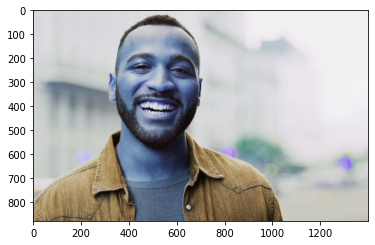

In [ ]:
#partie exemple
from matplotlib import pyplot as plt
plt.imshow(img)  # sert a afficher l'image en couleur bizare dans un format comme bgr matplotlib l'attend pour être rgb

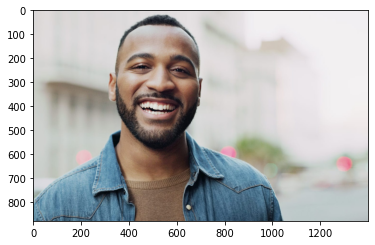

In [ ]:
#partie exemple
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  # sert a afficher l'image en couleur 

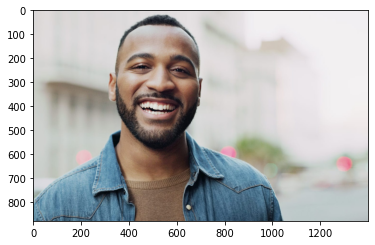

In [ ]:
#partie exemple
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  # sert a afficher l'image en couleur sans la ligne bizare en haut
plt.show()   #enleve la ligne <matplotlib.image.AxesImage at 0x7f55fd28a3a0> en haut de l'image

In [ ]:
#partie vrai code
for image_class in os.listdir(data_dir):  #nous parcouron tout les dossier qui sont dans le dossier que data_dir represente
    for image in os.listdir(os.path.join(data_dir, image_class)):#toute les photo ou élément dans le dossier vont être parcouru
        image_path = os.path.join(data_dir, image_class, image)  #on saisie individuellment chaque image pour effectuer un par try par la suite 
        try: 
            img = cv2.imread(image_path)  #chargement de l'image dans openCV   #Attention cela doit être au format soit jpeg, jpg, bmp, png
                                          #sert a mettre une image sous format de tableau numphy bref un mega tableau array par image
            tip = imghdr.what(image_path)   #sert a supprimer une image qui n'est pas valide 
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)    #va supprimer l'image si elle nest pas valide
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

**3. Charger les données**

In [ ]:
#partie vrai code
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#partie exemple
data = tf.keras.utils.image_dataset_from_directory??

Cette ligne fait plusieur action automatique lier au traitement des image en ajoutant les ?? en fin de methode permet de savoir la configuration par defaut elle a. Par exemple elle redimension les image en format 256*256

In [ ]:
#partie vrai code
data = tf.keras.utils.image_dataset_from_directory(data_dir) #c'est la quon charge les donnée
#tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=16)  #exemple de si on voudrait faire une modification à la fonction automatique
# bref il faut aller dans  data = tf.keras.utils.image_dataset_from_directory?? pour avoir les attributs modifiables

Found 175 files belonging to 2 classes.


C'est ici qu'on charge les données. Keras a un fonction automatique de pipeline de donnée. image_dataset_from_directory va créer un ensemble de données d'image dans ce cas à la volée afin qu'on n'est pas besoin de créer des étiquette. Cela va aussi faire d'autre prétraitement dont le redimenssion d'image.  Cette ligne sert a avoir de l'information sur le prétraitement data = tf.keras.utils.image_dataset_from_directory??

In [ ]:
#partie vrai code
data_iterator = data.as_numpy_iterator()  #Si on veut jetter un oeil au donnée il faut les mettre sous forme d'iterateur numpy
# cest a cause que c un générateur a la voler sa laire qui faut faire cela pour recuperer les information

In [ ]:
#partie exemple   
data_iterator  # sa laire que sa facilite la vie si ont a beaucoup de donner traiter

In [ ]:
#partie vrai code
# Get another batch from the iterator
batch = data_iterator.next()  #va nous ramener un autre lots ou batch de donnée a traiter

In [ ]:
#partie exemple  
batch    #les données de toute images sous forme de tableau  

In [ ]:
#partie exemple  
len(batch)    #retourne le nombre de dossier que contient les image ou soit le nombre d'object detectable ici 2 dossier pour happy et sad

2

In [ ]:
#partie exemple  
# Images represented as numpy arrays
batch[0].shape #image representer sous forme de tableau numpy cher po si c vraiment sa un tableau numpy sa donne (32, 256, 256, 3)

(32, 256, 256, 3)

In [ ]:
#partie exemple  
batch[0]  #donne le tableau d'image qui est sous format de tableau numpy

In [ ]:
#partie exemple  
# classe 1 = personne triste (sad)
#classe 0 = personne contente (happy)
batch[1]   #donne un tableau avec les étiquette

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

bref batch[0] c le tableau numpy  et batch[1] c les étiquette

Note: batch[0] c les image sous format de tableau numpy et batch[1] c les étiquette

In [ ]:
#partie vrai code
fig, ax = plt.subplots(ncols=4, figsize=(20,20))  #utilisation de la fonction sous-parcelles de matplotlib pour pouvoir tracer quatre images à un moment donner
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

A partir d'ici les donnée sont charger
la prochaine étape est le pré-traitement

**PARTIE PRÉTRAITEMENT**

**4. Mettre les données à échelle**

In [ ]:
#partie exemple
batch[0].min()

0.0

In [ ]:
#partie exemple
batch[0].max()

255.0

batch[0] représente le tableau d'image sous format de tableau numpy. C'est valeur sont de 0 a 255. Le but est de les mettre les plus petite possible pour optimiser l'entrainement du modèle

In [ ]:
#partie exemple
batch[0] / 255   #divise le tableau par 255 pour que la valeur maximum soit 1

In [ ]:
#partie exemple
scaled = batch[0] / 255 #divise le tableau par 255 pour que la valeur maximum soit 1
scaled.min() #retourne la valeur minimum du tableau

0.0

In [ ]:
#partie exemple
scaled = batch[0] / 255 #divise le tableau par 255 pour que la valeur maximum soit 1
scaled.max() #retourne la valeur maximum du tableau

1.0

mettre les valeur sur 1 ou 255 (un des deux j'ai po trop comprit) sa permet au modèle a apprendre plus rapidement et en général donne de meilleur résultat

In [ ]:
#partie vrai code
data = data.map(lambda x,y: (x/255, y)) #utlitisation de la fonction map pour effectuer un type particulier de transformation pour
# accélérer la rapiditer avec laquelle nous pouvons accéder à nos données à partir de notre disque 
#lambda sert a pouvoir faire cette transformation
# x remprésente les image et y les étiquettes
#Attention les images et les étiquette sont dans data. batch les a contenu que temporairment

À l'interieur du pipelin de donné (variable "data") on va appelé la fonction map.
Cette fonction nous permet d'appliquer un type particulier de transformation.
Cette transformation va accélérer la rapiditer avec laquelle nous pouvons accéder à nos données à partir de notre disque .
La fonction lambda sert a pouvoir faire cette transformation. Bref Si j'ai bien comprit x remprésente les image et y les étiquettes

INFO: il y a des tonne de transformation qu'on peut faire a notre modèle.
sur google ya
tf.data: Build TensorFlow input pipelins
dans video c a 37:25 qui le montre

In [ ]:
#partie vrai code
data.as_numpy_iterator().next()   #comme à la partie 31 du colab je crois qu'il le met sous tableau numpy

sert a voir l'allure des tableau numpy et sassurer qu'il on des valeur de 0 a 1
Les deux ligne exemple montre comment voir la valeur min et max de c'est tableau

In [ ]:
#partie exemple
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].min() #retourne la valeur maximum du tableau

0.0

In [ ]:
#partie exemple
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].max() #retourne la valeur maximum du tableau

1.0

**5. Fractionner les données**

In [ ]:
#partie exemple
len(data)

6

rendu a 43:05

In [ ]:
#partie vrai code
train_size = int(len(data)*.7)   #sert à ce que notre modèle ne soit pas sur-ajusté
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
#partie vrai code
train_size

4

In [ ]:
#partie vrai code
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**6. Construire un modèle d'apprentissage en profondeur**

In [ ]:
#partie vrai code
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#partie vrai code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#partie vrai code
model = Sequential()

In [ ]:
#partie vrai code
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#partie vrai code
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#partie vrai code
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**8. entraîner**

In [ ]:
#partie vrai code
logdir='logs'   #note le faire a un autre emplacement sa vient s'ajouter au dossier happy et sad au Début c qui fuck le truc si on réentraine le model
# le créer a un autre endroit pour éviter quon prenne ce dossier pour un dossier avec des photo  pour l'entrainement

In [ ]:
#partie vrai code
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#partie vrai code
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 14s 3s/step - loss: 0.8771 - accuracy: 0.5078 - val_loss: 0.5466 - val_accuracy: 0.6875
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.6611 - accuracy: 0.5625 - val_loss: 0.6003 - val_accuracy: 0.7188
Epoch 3/20
4/4 [==============================] - 14s 3s/step - loss: 0.6428 - accuracy: 0.5625 - val_loss: 0.6222 - val_accuracy: 0.5312
Epoch 4/20
4/4 [==============================] - 14s 3s/step - loss: 0.5935 - accuracy: 0.6797 - val_loss: 0.5595 - val_accuracy: 0.9062
Epoch 5/20
4/4 [==============================] - 14s 3s/step - loss: 0.5443 - accuracy: 0.8281 - val_loss: 0.5661 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 14s 3s/step - loss: 0.4958 - accuracy: 0.7500 - val_loss: 0.4515 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.4020 - accuracy: 0.8906 - val_loss: 0.4055 - val_accuracy: 0.8438
Epoch 8/20
4/4 [==================

In [ ]:
#partie exemple
hist.history

**8. Performances du tracé ou Plot Performance**

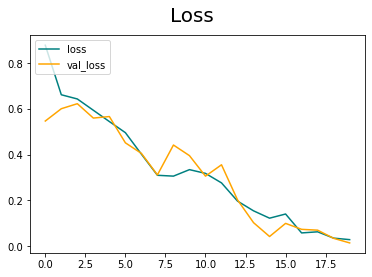

In [ ]:
#partie vrai code
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

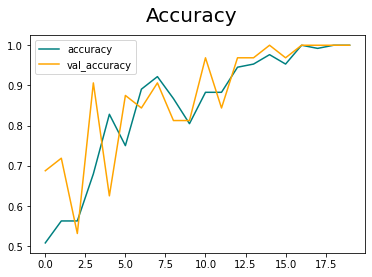

In [ ]:
#partie vrai code
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**9. Évaluer le modèle**

In [ ]:
#partie vrai code
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
#partie vrai code
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
#partie vrai code
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
#partie vrai code
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


**10. Test**

In [ ]:
#partie vrai code
import cv2

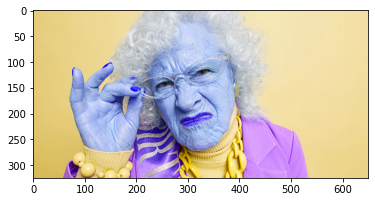

In [ ]:
#partie vrai code

#img = cv2.imread('154006829.jpg')
img = cv2.imread(os.path.join('/content/gdrive/MyDrive/TestClassificationImage/test2Sad.jpg'))   #mettre un image test qui ne sait pas entrainer avec
plt.imshow(img)
plt.show()

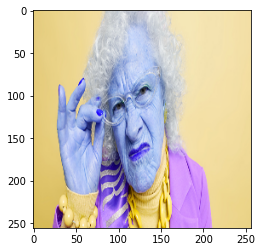

In [ ]:
#partie vrai code
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
#partie vrai code
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [ ]:
#partie vrai code
yhat

array([[0.13615362]], dtype=float32)

In [ ]:
#partie vrai code
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


**11. Enregistrer le modèle**

In [ ]:
#partie vrai codef
rom tensorflow.keras.models import load_model

SyntaxError: ignored

In [ ]:
#partie vrai code
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
#partie code conversion en tensorflowlite pour une utilisation android
#recuperer sur un autre code 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
#partie vrai code
new_model = load_model('imageclassifier.h5')

In [ ]:
#partie vrai code
new_model.predict(np.expand_dims(resize/255, 0))